# Лабораторная работа №2
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

[Описание лабораторной работы](http://localhost:8888/tree/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/Opisanie_laboratornoi_774_raboty__2.pdf)

In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\elextom\\OneDrive\\Documents\\A-14m-16\\2CURSE3SEM\\optimal_control\\opt_ctrl_lab_2\\lab_2\\')
sys.path.insert(0, 'C:\\Users\\ivanm\\OneDrive\\Documents\\A-14m-16\\2CURSE3SEM\\optimal_control\\opt_ctrl_lab_2\\lab_2\\')
#print(sys.path)

In [2]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA

colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Исходные данные

In [4]:
# Решение тестового примера
def x(s, t):
    #return ((t + 1.) * (s - 1.)) ** 2
    #return t ** 2 * (s - 1.) ** 2
    #return (s ** 2 - 1. * s) ** 2
    #return (s - 1) ** 2
    return 0.
    
# Плотность внешних сил
def f(s, t):
    #return 2. * (s - 1.) ** 2 - 2. * 1 ** 2 * (t + 1.) ** 2
    #return -2. * 1 ** 2 * t ** 2 + 2. * (s - 1.) ** 2
    #return -1. * (12. * s ** 2 - 12. * s + 2.) * 1. ** 2
    #return -2. * 1. ** 2
    return 0.
    
# Внешняя сила, действующая на левый конец
def p(t):
    #return -2. * (t + 1.) ** 2
    #return -2. * t ** 2
    #return 0.
    #return -2. 
    return 0.
    
# Положение струны в начальный момент времени
def fi_0(s):
    #return (s - 1.) ** 2
    #return 0.
    #return (s ** 2 - 1. * s) ** 2
    #return (s - 1) ** 2  
    return 0.
    
# Вторая производная по s положение струны в начальный момент времени
def d2fi_0(s):
    #return  2.
    #return 0.
    #return 1. * (12. * s ** 2 - 12. * s + 2.)
    #return 2. * 1. ** 2
    return 0.
    
# скорость струны в начальный момент времени
def fi_1(s):
    #return 2. * (s - 1.) ** 2
    #return 0
    #return 0.
    #return 0.
    return 0.
    
# Желаемое распределение температуры
def y(s):
    return (s ** 2 - 1. * s) ** 2
    #return s ** 2
    #return 0.

In [5]:
# Словарь параметров
p_d = {}

# Заданные положительные величины
p_d['a'], p_d['l'], p_d['T'] = 1., 2., 1.

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['R_0'], p_d['R_1'] = 10., 10.

p_d['fi_0(s)'], p_d['fi_1(s)'], p_d['d2fi_0(s)'] = fi_0, fi_1, d2fi_0

p_d['y(s)'] = y

# Значение веса в схеме
p_d['sigma'] = 1. / 2.1

p_d['N'] = 40

# Число точек на пространственной и временной сетке соответственно
if p_d['sigma'] <= 1. / 4.:  
    p_d['M'] = max(math.ceil(p_d['T'] / p_d['l'] * p_d['a'] * (1 - 4. * p_d['sigma']) ** .5 * p_d['N']),
                   math.ceil(p_d['N'] * p_d['a'] * p_d['T'] / p_d['l']))
elif p_d['sigma'] == 0.:
    p_d['M'] = math.ceil(p_d['N'] * p_d['a'] * p_d['T'] / p_d['l'])
else:
    p_d['M'] = 40

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(2.0, 1.0, 0.05, 0.025)

---
# Создание модели и управление

In [6]:
model = utils.Lab2OptCtrlModel(p_d)

In [7]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_4

In [8]:
%%time
model.solve(criterion, get_alpha, eps=10**-8)

10000000.0
0.344181311774
0.0664425868648
0.0536175922356
0.0535861945069
0.18699124087
0.0603558974684
0.0167297075844
0.0185396809639
0.02071815174
0.0273074862137
0.0372146970958
0.0174617958031
0.0386616123429
0.0223626941463
0.0121215478211
0.10213729218
0.0315951188342
0.00378226073758
0.0292640999955
0.0103656443874
0.0439620068684
0.0118850429332
0.00575092685084
0.039903727342
0.00699347731377
0.00746100019417
0.0213110238212
0.00714239665504
0.00840854777734
0.0096308233625
5.99267753061e-05
0.0341980420119
0.00904527517246
0.00249001624464
0.0157612021333
0.00630378138213
0.00965929577633
0.00111499015543
0.0298447620632
0.0041447732618
0.0102225254196
0.00378795082847
0.0034305255664
0.0182669573496
0.00216566745256
0.00846065012405
0.000342516959617
0.025286921316
0.0122894299689
0.0012388409384
0.00641738217058
0.00273048302805
0.000165835465072
0.00251824334778
0.000223759237191
0.00558348270213
0.000195071688029
0.0111186480811
0.00469041052084
0.00226222164891
0.000376

0.000115505401875
0.000104936934995
0.000120571237453
0.000112925061356
5.69726420116e-06
0.000453742760151
9.90753170881e-05
0.000256480323749
6.07052879326e-05
0.000103403980212
9.05565841954e-05
0.000118530583965
0.000118065605994
5.92859553827e-06
0.000449040661857
9.22749613405e-05
0.000238528574219
4.71755604086e-05
9.74783159721e-05
0.000272141061675
6.97481929378e-05
0.000110116884616
0.000111682076654
1.01015254831e-05
0.000393934655169
0.000221970346949
9.97737505663e-05
0.000100838463566
1.50098506266e-05
0.0006385350874
0.000242457079112
0.000109758476207
0.000126847523427
9.38256204919e-06
0.000396723514302
0.000220899995249
9.42280410426e-05
0.000104233031088
1.76071831243e-05
0.000545271551677
0.000158492836133
3.62071993071e-05
9.64815563534e-05
0.00011722857663
1.67482277989e-05
0.00055444161406
0.00016323624413
4.45514367803e-05
0.000106225835521
0.000149225583788
9.0693562242e-06
0.000389949971336
0.000210284015626
7.98126989232e-05
9.61355113196e-05
2.50625815029e-0

2.11890123891e-05
4.77577020058e-06
1.22441541335e-05
1.4942452626e-05
1.97433203038e-06
7.29978632251e-05
2.37050021108e-05
8.98777282222e-06
2.62246157737e-05
2.50215065292e-06
2.34137159806e-05
8.76833776976e-06
2.52910829725e-05
1.99751928345e-06
2.20277487689e-05
7.97741255765e-06
2.11065078443e-05
1.8856334159e-08
3.24999805629e-05
1.38413220363e-05
3.84199150738e-06
1.19130704235e-05
1.66773676884e-05
2.12613272563e-06
6.46700581452e-05
1.63509670649e-05
5.97979094987e-06
1.43174168603e-05
4.56533706165e-06
1.29711335272e-05
3.81053477916e-06
1.2228279796e-05
3.39880868015e-06
1.18277626523e-05
1.8235474292e-05
2.10649160089e-06
6.24796920315e-05
1.45551365432e-05
6.12664949748e-06
1.49401084794e-05
5.86329503675e-06
1.47227397849e-05
5.71405569911e-06
1.45745849253e-05
5.65354108094e-06
1.45275487111e-05
5.66441986902e-06
1.45599482664e-05
5.72645855865e-06
1.464795025e-05
5.82154927111e-06
1.47710850176e-05
5.9353965733e-06
1.49135607117e-05
6.05771695126e-06
1.50642288094e-05

4.05807236154e-07
7.74317962291e-06
2.95457322609e-06
6.72760818467e-07
3.6417155591e-06
2.09240270208e-07
4.98495074772e-06
8.53832663891e-07
3.4332288582e-06
2.19649732172e-06
5.06752801186e-07
6.43891199666e-06
2.0371703889e-06
2.725870913e-07
5.2243307588e-06
1.24154476242e-06
3.28931982544e-06
1.00851338688e-06
1.37165184588e-06
5.89783574027e-06
2.81422926058e-06
1.35496144526e-06
1.74303114755e-06
2.93107800311e-08
2.09615741171e-06
1.34271163541e-06
1.58376309914e-06
3.18108471306e-06
6.83601144707e-07
3.32366565972e-06
1.88847630665e-07
6.14310452539e-06
1.15377242384e-06
9.27615399661e-06
1.39331757074e-06
1.63399042653e-06
3.66734905252e-06
8.913981223e-07
1.45473127125e-06
2.97361363808e-06
5.00699092973e-07
3.05732241341e-06
3.60761302869e-08
7.75223324191e-06
2.1603733882e-06
1.93020764992e-06
3.05174634926e-08
4.23637095507e-06
1.63311149335e-07
6.29613221266e-06
1.09117627091e-06
9.58202764513e-06
1.64072134194e-06
1.75078189279e-06
1.457808337e-06
1.81425955042e-06
1.6

In [9]:
model.final_step

1587

---
# Процесс управления

In [10]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

In [11]:
y_s = model.y_arr
bounds = [min(y_s), max(y_s)]

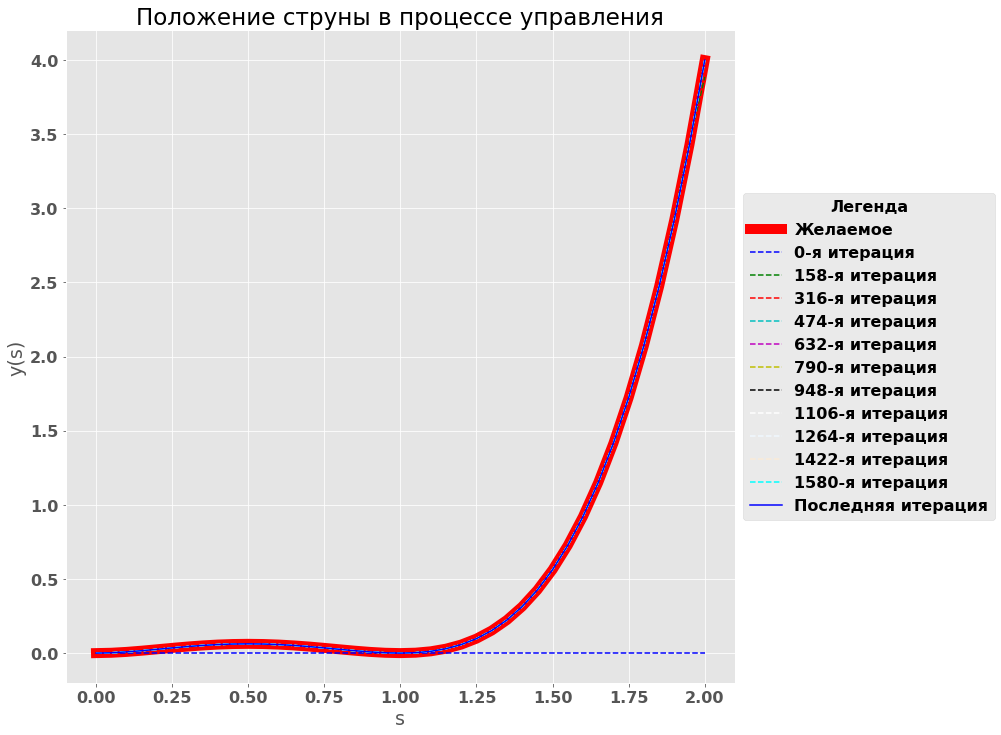

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', linewidth=10., label='Желаемое')
part = 1
count = 10
step = int(model.final_step / count / part)
if step != 0:
    for i in range(0, int(model.final_step / part), step):
        ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
    ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
    plt.xlabel('s')
    plt.ylabel('y(s)')
    plt.title('Положение струны в процессе управления')
    plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
else:
    ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
    plt.xlabel('s')
    plt.ylabel('y(s)')
    plt.title('Положение струны в процессе управления')
    plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное положение струны

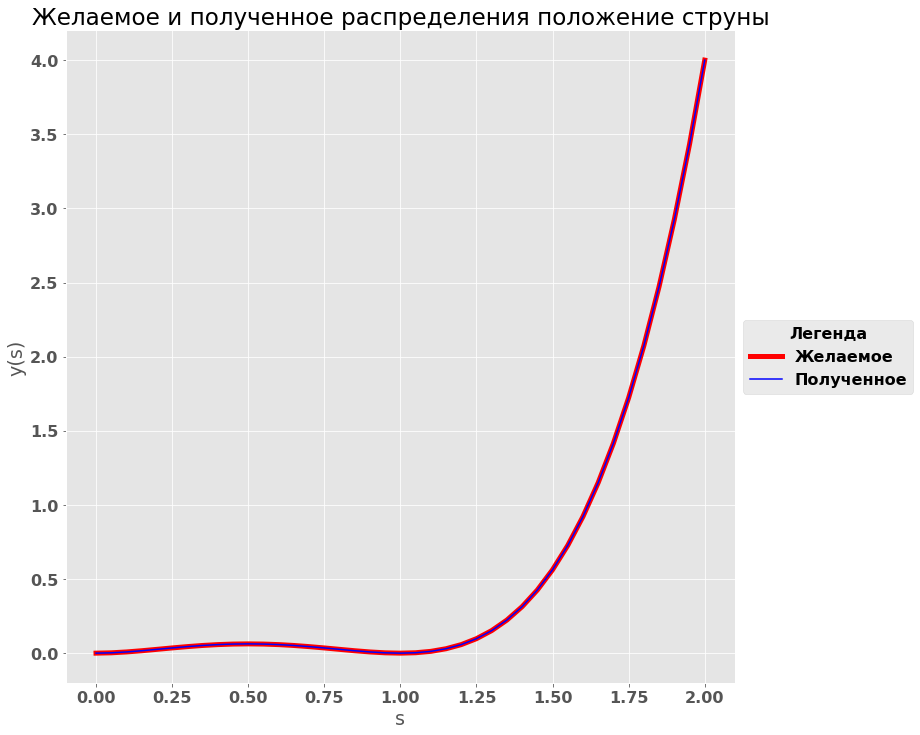

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', linewidth=5., label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
#ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения положение струны')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(3.4029071950249583e-09, 0.1000000034029072)

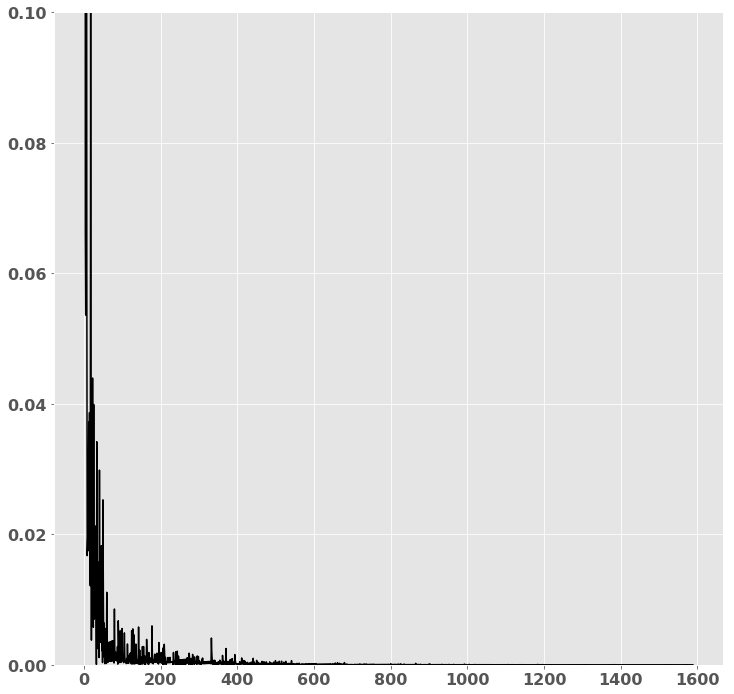

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])

---
# Управление

In [15]:
X_ = np.arange(0., p_d['l'] + p_d['dh'] / 4., p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'] / 4., p_d['dt'])
X_, Y_ = np.meshgrid(X_, Y_)
print(np.shape(X_), np.shape(Y_))

(41, 41) (41, 41)


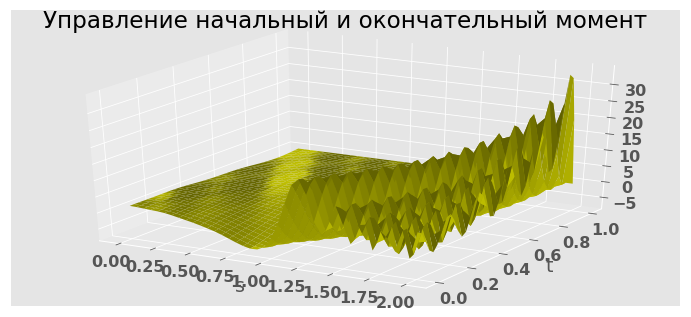

In [16]:
Z = model.f_arr[-1]

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='y')
plt.xlabel('s')
plt.ylabel('t')
plt.title('Управление начальный и окончательный момент')
plt.show()

---
# Решение второстепенной задачи

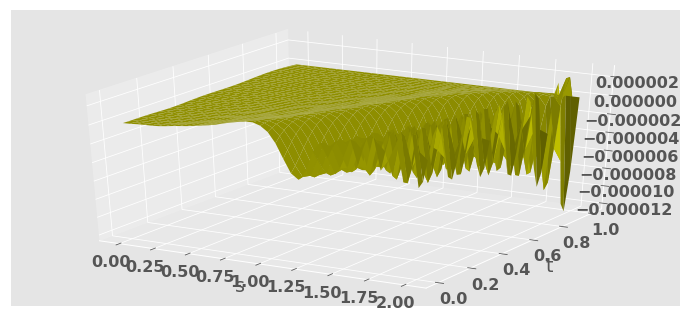

In [17]:
Z = model.psi_arr[-1]

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='y')
plt.xlabel('s')
plt.ylabel('t')

plt.show()